# Spotify Song Attributes

Dataset: https://www.kaggle.com/datasets/geomack/spotifyclassification

Columns Description: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

## Context

A dataset of 2017 songs with attributes from Spotify's API. Each song is labeled "1" meaning I (dataset's author) like it and "0" for songs I don't like. I used this to data to see if I could build a classifier that could predict whether or not I would like a song.

In [1]:
import matplotlib.pyplot as plt  #visualisation
import pandas as pd
import seaborn as sns  #visualisation
import numpy as np
%matplotlib inline
sns.set(color_codes=True)

## Explore Datatypes

In [2]:
df = pd.read_csv('../input/spotifyclassification/data.csv')
df.head(5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
df.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [4]:
display(df.describe())

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


None

## Columns Description

- **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **duration_ms** - The duration of the track in milliseconds.
- **energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **instrumentalness** - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **key** - The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- **liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- **mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **time_signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- **valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **target** - 1 if I like the song and 0 if I don't.

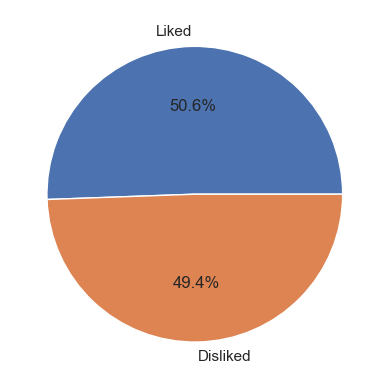

In [6]:
plt.pie(df['target'].value_counts(), labels=['Liked', 'Disliked'], autopct='%1.1f%%')
plt.show()

Number of Like and Dislike songs are almost equal.

## Plotting Distribution of Data

We need to split the data into discrete and continuous columns. Plotting them and comparing them with the target column.

In [7]:
discrete_cols = ['mode', 'key', 'time_signature']
df_continuous = df.drop(discrete_cols, axis=1).drop(['target', 'Unnamed: 0', 'song_title', 'artist'], axis=1)
df_discrete = df[discrete_cols];

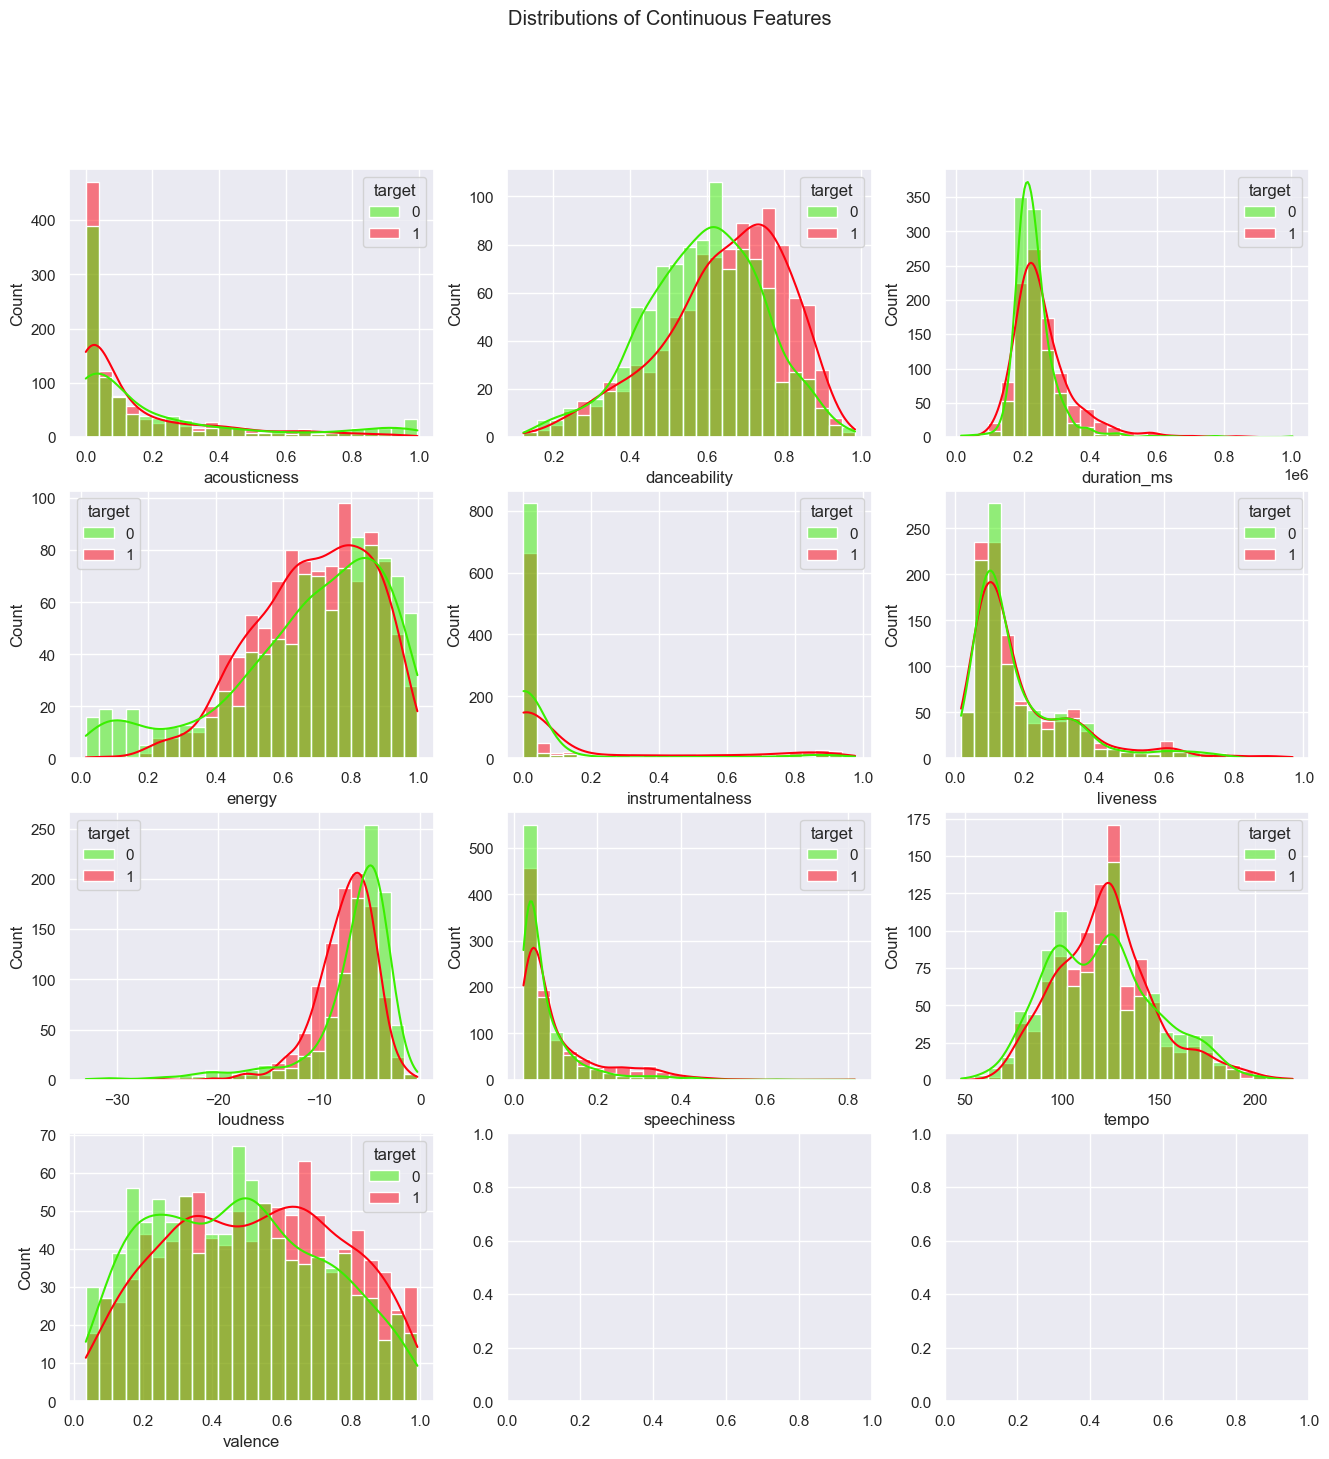

In [8]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
fig.suptitle('Distributions of Continuous Features')
sns.set_palette('prism')
axes = axes.flatten()
ax_no = 0
num_cols = df_continuous.select_dtypes('number').columns
for col in num_cols:
    sns.histplot(data=df_continuous, x=col, bins=25, kde=True, ax=axes[ax_no], hue=df['target'])
    ax_no += 1
plt.show()

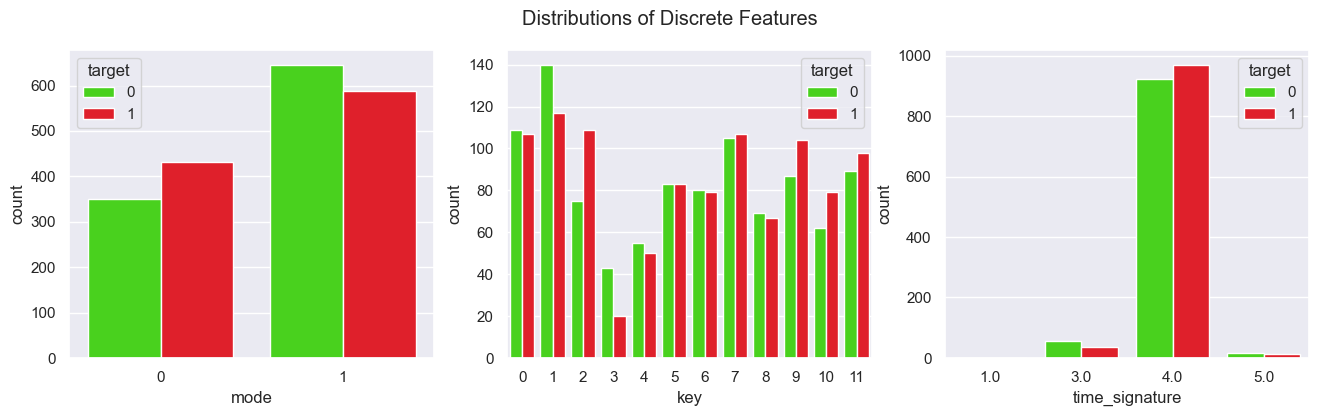

In [9]:
sns.set_palette('prism')
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Distributions of Discrete Features')
axes = axes.flatten()
ax_no = 0
num_cols = df_discrete.columns
for col in num_cols:
    sns.countplot(data=df_discrete, x=col, ax=axes[ax_no], hue=df['target'])
    ax_no += 1
plt.show()

'Like' and 'Dislike' songs are distributed similarly for all the columns.

## Correlation Matrix

C:\Users\duongdinh\AppData\Local\Temp\ipykernel_39484\2915632954.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(['Unnamed: 0'], axis=1).corr()


Text(0.5, 1.0, 'Negative Correlations')

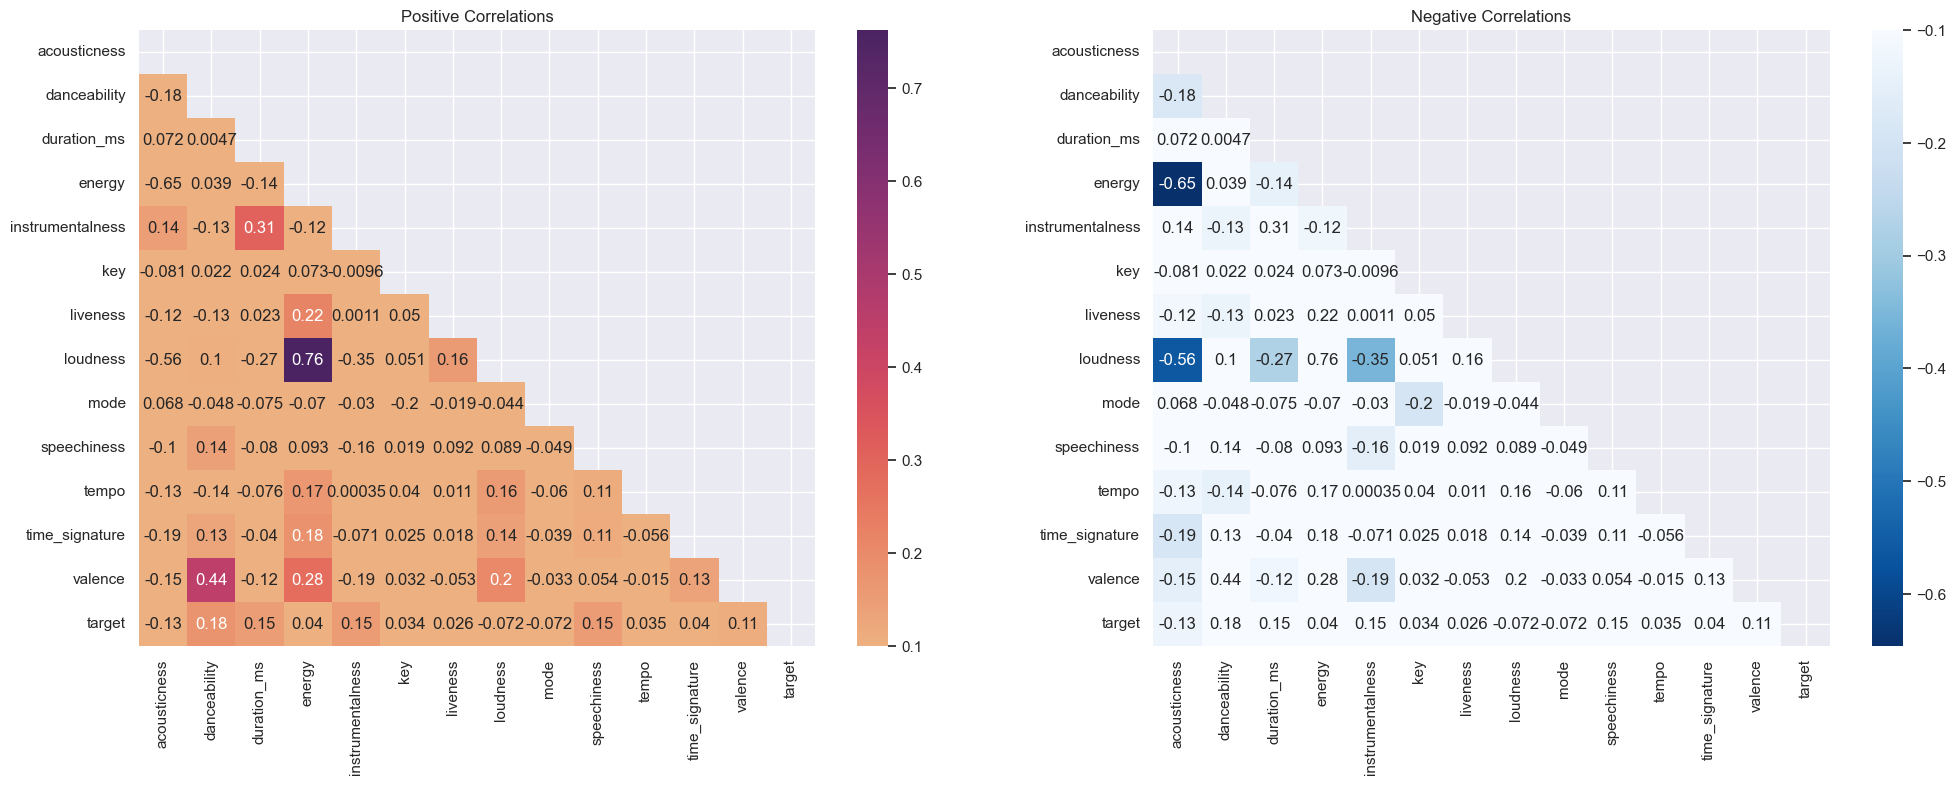

In [10]:
fig, axes = plt.subplots(1,2, figsize=(24,8))
corr = df.drop(['Unnamed: 0'], axis=1).corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(data= corr, annot=True, cmap ='flare', ax = axes[0], mask = mask, vmin= 0.1)
axes[0].set_title('Positive Correlations')
sns.heatmap(data= corr, annot=True, cmap ='Blues_r', ax = axes[1], mask = mask, vmax=-0.1)
axes[1].set_title('Negative Correlations')

### Positive Correlations
- **loudness** and **energy** are highly correlated.
- **danceability** and **valance** are highly correlated.

### Negative Correlations
- **acousticness** and **energy** are highly correlated.
- **acousticness** and **loudness** are highly correlated.

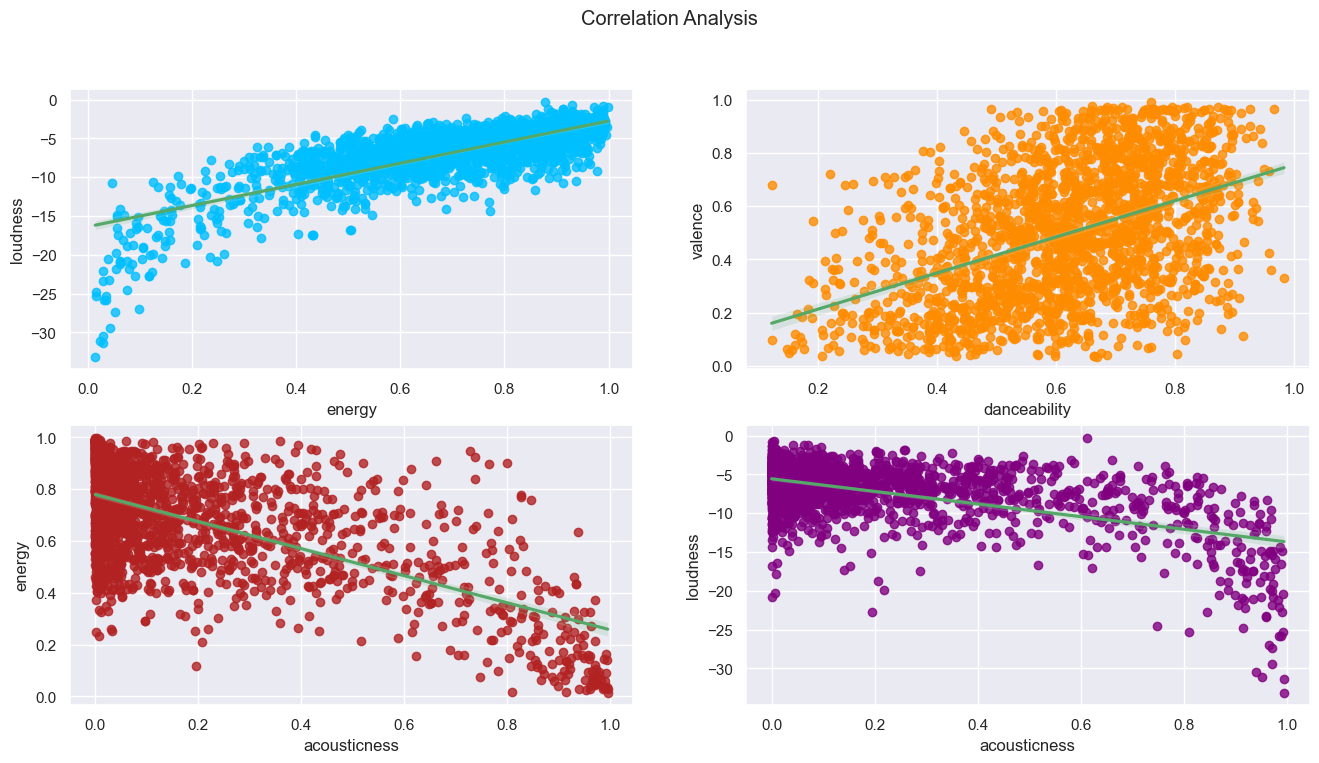

In [11]:
correlation_map = [
    {
        'x': 'energy',
        'y': 'loudness',
    },
    {
        'x': 'danceability',
        'y': 'valence',
    },
    {
        'x': 'acousticness',
        'y': 'energy',
    },
    {
        'x': 'acousticness',
        'y': 'loudness',
    }
]

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle('Correlation Analysis')
axes = axes.flatten()
colors = ['deepskyblue', 'darkorange', 'firebrick', 'purple']

for item in correlation_map:
    sns.regplot(data=df, x=item['x'], y=item['y'],
                ax=axes[correlation_map.index(item)],
                color=colors[correlation_map.index(item)],
                line_kws={'color': 'g'})

**loudness** and **energy** and **acousticness** are highly correlated. Their data points are aligned together.

# Machine Learning
After exploring the data, we can now start building our machine learning model to predict whether author like a song or not.

## Decision Tree

We are doing a classification problem with binary output. So, let's try with Decision Tree.

We drop the columns which are not required or have high correlation.

In [12]:
df_preprocessed = df.select_dtypes('number').drop(['Unnamed: 0', 'loudness', 'acousticness'], axis=1)
df_preprocessed.head(5)

,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,target
0,0.833,204600,0.434,0.021900,2,0.1650,1,0.4310,150.062,4.0,0.286,1
1,0.743,326933,0.359,0.006110,1,0.1370,1,0.0794,160.083,4.0,0.588,1
2,0.838,185707,0.412,0.000234,2,0.1590,1,0.2890,75.044,4.0,0.173,1
3,0.494,199413,0.338,0.510000,5,0.0922,1,0.0261,86.468,4.0,0.230,1
4,0.678,392893,0.561,0.512000,5,0.4390,0,0.0694,174.004,4.0,0.904,1


Spit data

In [13]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [14]:
train_df, test_df = train_test_split(df_preprocessed, test_size=0.2, random_state=len(df_preprocessed.columns))

X_train, y_train = train_df.drop('target', axis=1), train_df['target']
X_test, y_test = test_df.drop('target', axis=1), test_df['target']

Build and Run model

In [15]:
model = DecisionTreeClassifier()
model_scores = pd.DataFrame(cross_validate(model, X_train, y_train, cv=10, return_train_score=True))
model_scores

,fit_time,score_time,test_score,train_score
0,0.011201,0.003003,0.746914,0.999311
1,0.010195,0.000991,0.740741,0.999311
2,0.008156,0.001009,0.709877,0.999311
3,0.008072,0.000990,0.677019,1.000000
4,0.008113,0.001016,0.670807,0.999311
5,0.008157,0.000000,0.714286,0.999311
6,0.008377,0.000000,0.670807,0.999311
7,0.008070,0.000999,0.614907,0.999311
8,0.007132,0.002010,0.708075,0.999311
9,0.007158,0.000999,0.652174,0.999311


In [16]:
model_scores.mean()

fit_time       0.008463
score_time     0.001102
test_score     0.690561
train_score    0.999380
dtype: float64

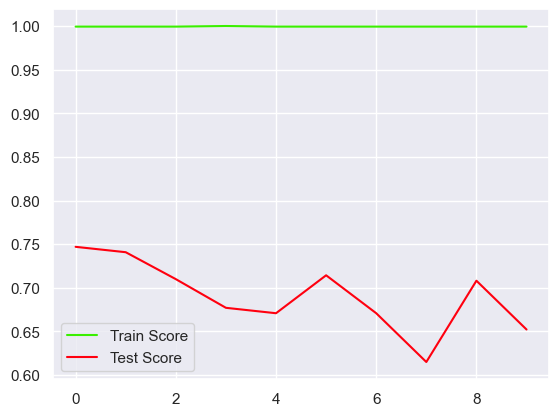

In [17]:
plt.plot(model_scores['train_score'], label='Train Score', data=model_scores)
plt.plot(model_scores['test_score'], label='Test Score', data=model_scores)
plt.legend()
plt.show()

Train score is close to 1.0. Test score is varying a lot. This is a sign of overfitting. Let's try a few different depths and see if we can improve the model.

In [18]:
results_dict = {
    "max_depth": [],
    "mean_train_score": [],
    "mean_cv_score": []
}

for depth in range(1, 26):
    model = DecisionTreeClassifier(max_depth=depth)
    cv_score = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["max_depth"].append(depth)
    results_dict["mean_cv_score"].append(np.mean(cv_score["test_score"]))
    results_dict["mean_train_score"].append(np.mean(cv_score["train_score"]))

pd.DataFrame(results_dict)

,max_depth,mean_train_score,mean_cv_score
0,1,0.642901,0.642267
1,2,0.707584,0.693095
2,3,0.724806,0.694943
3,4,0.758972,0.717261
4,5,0.776469,0.718496
5,6,0.799408,0.734633
6,7,0.829442,0.721003
7,8,0.859888,0.717920
8,9,0.889854,0.711705
9,10,0.915478,0.696151


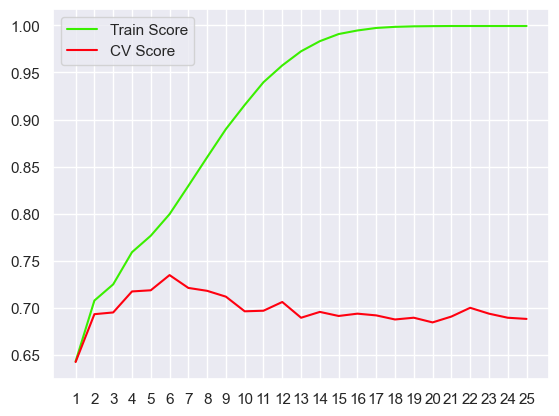

In [19]:
plt.plot(results_dict['max_depth'], results_dict['mean_train_score'], label='Train Score')
plt.plot(results_dict['max_depth'], results_dict['mean_cv_score'], label='CV Score')
plt.xticks(results_dict['max_depth'])
plt.legend()
plt.show()

We can see that `max_depth=6` gives highest validation score. Let's try with that.

In [20]:
optimal_model = DecisionTreeClassifier(max_depth=6)
optimal_scores = pd.DataFrame(cross_validate(optimal_model, X_train, y_train, cv=10, return_train_score=True))
display(optimal_scores)
display(optimal_scores.mean())

,fit_time,score_time,test_score,train_score
0,0.015006,0.000000,0.697531,0.808408
1,0.000000,0.000000,0.783951,0.791178
2,0.018312,0.000000,0.753086,0.798070
3,0.000000,0.000000,0.708075,0.798898
4,0.013505,0.000000,0.708075,0.794077
5,0.000000,0.000000,0.813665,0.785124
6,0.015637,0.000000,0.677019,0.809229
7,0.000000,0.000000,0.689441,0.800275
8,0.000000,0.015636,0.726708,0.803030
9,0.000000,0.000000,0.739130,0.806474


fit_time       0.006246
score_time     0.001564
test_score     0.729668
train_score    0.799476
dtype: float64

Test score increased from 0.68 to 0.73. Let's fitting the model with the optimal depth.

In [21]:
optimal_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

C:\Users\duongdinh\Projects\DataScience\Analysis\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


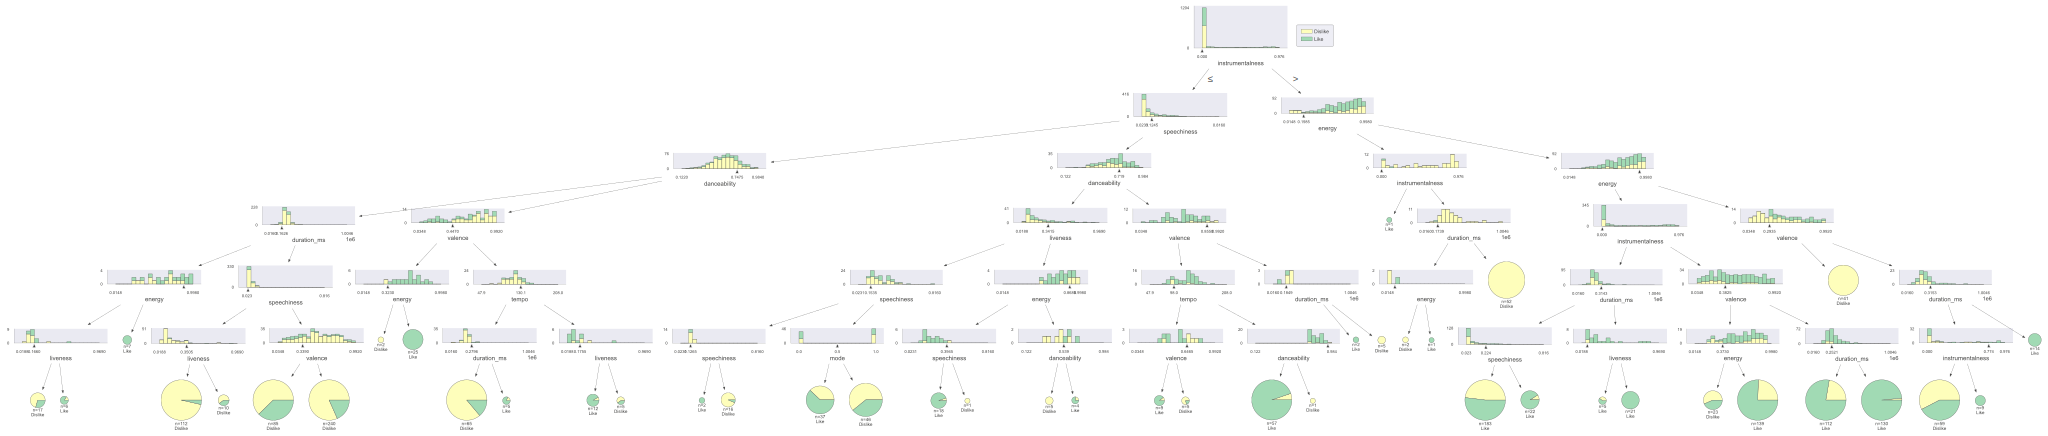

In [22]:
import dtreeviz
import os

os.environ["PATH"] += os.pathsep + '../Graphviz/bin'

dt_viz = dtreeviz.model(
    optimal_model,
    X_train=X_train,
    y_train=y_train,
    feature_names=X_train.columns,
    class_names=['Dislike', 'Like'],
)
dt_viz.view()

Let's try to predict the test data.

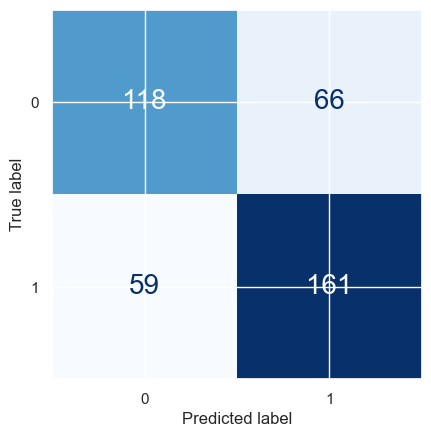

In [51]:
y_pred = optimal_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(colorbar=False, cmap='Blues', text_kw={'fontsize': 20})

In [24]:
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)

print(f'Accuracy: {dt_accuracy}')
print(f'Precision: {dt_precision}')
print(f'Recall: {dt_recall}')

Accuracy: 0.6905940594059405
Precision: 0.7092511013215859
Recall: 0.7318181818181818


## Random Forest

Let's try upgrade our model with Random Forest to see if we can improve the score.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [26]:
rf_model = RandomForestClassifier()
rf_scores = pd.DataFrame(cross_validate(rf_model, X_train, y_train, cv=10, return_train_score=True))
display(rf_scores)
display(rf_scores.mean())

,fit_time,score_time,test_score,train_score
0,0.364720,0.011000,0.740741,0.999311
1,0.328596,0.007999,0.783951,0.999311
2,0.320896,0.006999,0.734568,0.999311
3,0.369116,0.010005,0.751553,1.000000
4,0.347321,0.008011,0.782609,0.999311
5,0.343802,0.006988,0.801242,0.999311
6,0.368185,0.005997,0.751553,0.999311
7,0.342077,0.007991,0.701863,0.999311
8,0.360421,0.010532,0.788820,0.999311
9,0.449219,0.010008,0.776398,0.999311


fit_time       0.359435
score_time     0.008553
test_score     0.761330
train_score    0.999380
dtype: float64

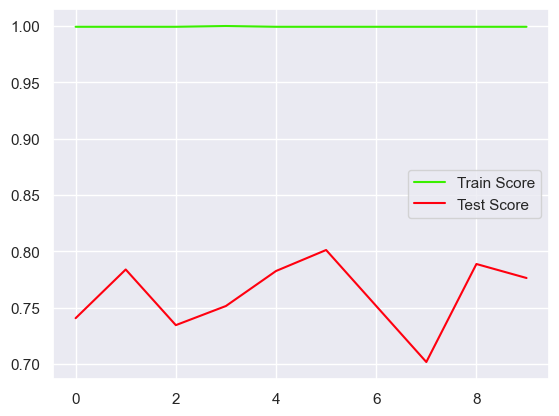

In [27]:
plt.plot(rf_scores['train_score'], label='Train Score', data=rf_scores)
plt.plot(rf_scores['test_score'], label='Test Score', data=rf_scores)
plt.legend()
plt.show()

Mean test score is 0.73. Equal to the optimal version of Decision Tree.
Mean train score is 1.0. This is a sign of overfitting. Let's try to tune the hyperparameters to improve the model.

In [28]:
rf_params = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=500, num=10)],
    'max_depth': [int(x) for x in range(0, 10)],
}

rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_params, n_iter=10, cv=3, verbose=2, random_state=50, n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=50, verbose=2)

In [29]:
display(f'Best Parameters: {rf_random.best_params_}')
display(f'Best Score: {rf_random.best_score_}')

"Best Parameters: {'n_estimators': 400, 'max_depth': 5}"

'Best Score: 0.7519989200639655'

0.75, a little bit better.

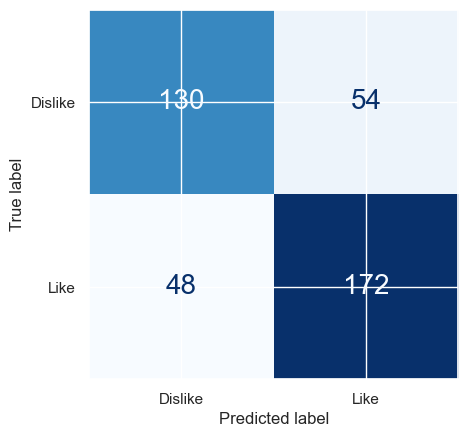

In [50]:
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dislike', 'Like'])
disp.plot(colorbar=False, cmap='Blues', text_kw={'fontsize': 20})

In [31]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)

print(f'Accuracy: {rf_accuracy}')
print(f'Precision: {rf_precision}')
print(f'Recall: {rf_recall}')

Accuracy: 0.7475247524752475
Precision: 0.7610619469026548
Recall: 0.7818181818181819


Compare the scores of the two models.

In [52]:
df_supervised_score = pd.DataFrame({
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall]
}, index=['Accuracy', 'Precision', 'Recall'])
df_supervised_score

,Decision Tree,Random Forest
Accuracy,0.690594,0.747525
Precision,0.709251,0.761062
Recall,0.731818,0.781818


## K-Means Clustering

Decision Tree and Random Forest are supervised learning models. They need labeled data to train. K-Means Clustering is the most popular unsupervised learning model. It can be used to find group/cluster in unlabeled data. Let's try to use it to find patterns in our data and see if it fits our problem.

In [33]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [34]:
df_preprocessed.head(5)

,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,target
0,0.833,204600,0.434,0.021900,2,0.1650,1,0.4310,150.062,4.0,0.286,1
1,0.743,326933,0.359,0.006110,1,0.1370,1,0.0794,160.083,4.0,0.588,1
2,0.838,185707,0.412,0.000234,2,0.1590,1,0.2890,75.044,4.0,0.173,1
3,0.494,199413,0.338,0.510000,5,0.0922,1,0.0261,86.468,4.0,0.230,1
4,0.678,392893,0.561,0.512000,5,0.4390,0,0.0694,174.004,4.0,0.904,1


Split data and labels

In [35]:
df_unlabeled_data = df_preprocessed.drop(columns=['target', 'mode', 'key', 'time_signature'])
df_labels = df_preprocessed['target']

Prepare to scale all columns to (0, 1) and reduce the dimensionality of the data before clustering.

In [36]:
preprocess_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(
        n_components=2, random_state=50
    )),
])

cluster_pipeline = Pipeline([
    ('kmeans', KMeans(
        n_clusters=2, # 2 clusters, like and dislike
        random_state=50,
        n_init=10,
    ))
])

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('cluster', cluster_pipeline),
])

In [37]:
pipeline.fit(df_unlabeled_data)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=50))])),
                ('cluster',
                 Pipeline(steps=[('kmeans',
                                  KMeans(n_clusters=2, n_init=10,
                                         random_state=50))]))])

Let's see and evaluate the result.

In [38]:
preprocess_data = pipeline['preprocess'].transform(df_unlabeled_data)
predicted_labels = pipeline['cluster']['kmeans'].labels_

true_labels = np.array(df_labels).reshape(-1, 1).flatten()

print(f'Silhouette Score: {silhouette_score(preprocess_data, predicted_labels)}')
print(f'Adjusted Rand Score: {adjusted_rand_score(true_labels, predicted_labels)}')

Silhouette Score: 0.591668606910891
Adjusted Rand Score: 0.005435334976487452


A silhouette coefficient of 0 indicates that clusters are significantly overlapping one another, and a silhouette coefficient of 1 indicates clusters are well-separated. An ARI score of 0 indicates that cluster labels are randomly assigned, and an ARI score of 1 means that the true labels and predicted labels form identical clusters.
Let's see how the result looks like.

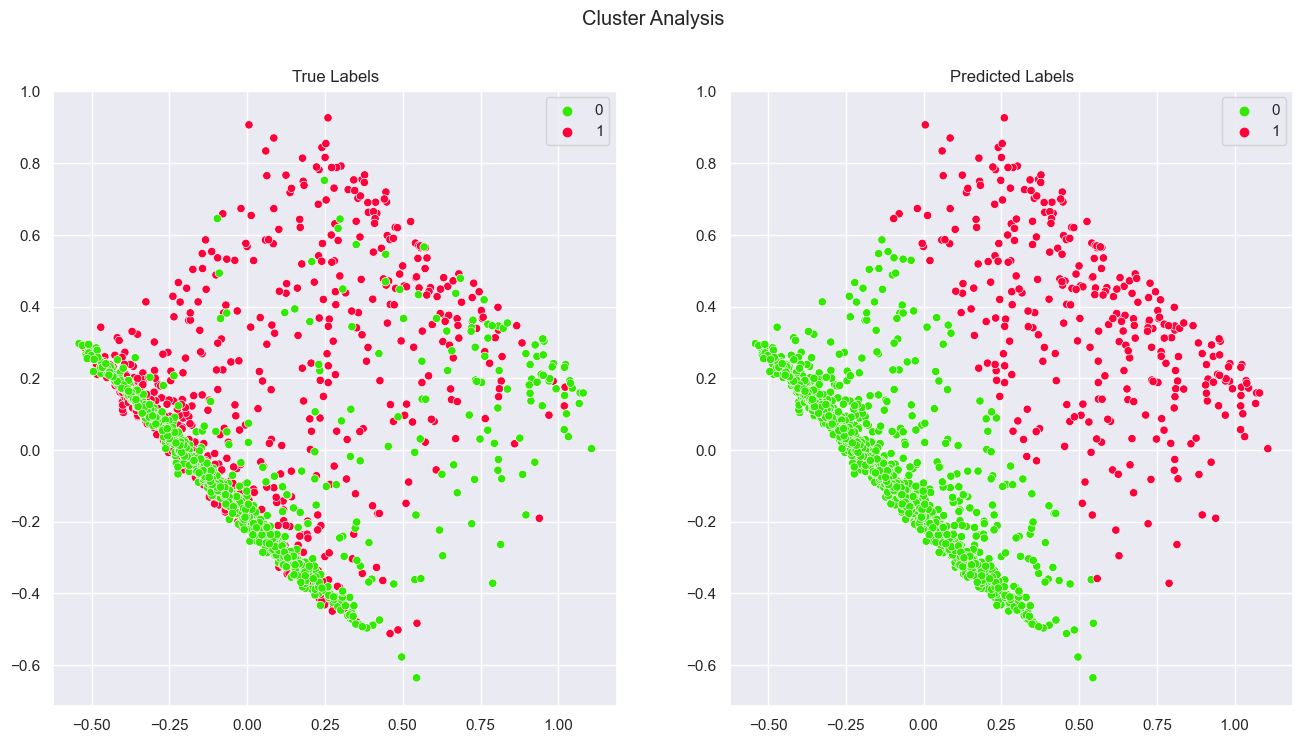

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Cluster Analysis')
axes = axes.flatten()

sns.scatterplot(
    x=preprocess_data[:, 0],
    y=preprocess_data[:, 1],
    hue=true_labels,
    palette=sns.color_palette('prism', 2),
    ax=axes[0],
).set_title('True Labels')

sns.scatterplot(
    x=preprocess_data[:, 0],
    y=preprocess_data[:, 1],
    hue=predicted_labels,
    palette=sns.color_palette('prism', 2),
    ax=axes[1],
).set_title('Predicted Labels')

plt.show()

The algorithm is fine. It can determine 2 clusters correctly but the problem is our labels. They're blending in both 2 clusters. Maybe we can increase dimension to see if they can improve.

In [40]:
score = {
    'silhouette': [],
    'adjusted_rand': [],
}

scaler_tuple = ('scaler', MinMaxScaler())

max_dimension = len(df_unlabeled_data.columns)
for n_components in range(2, max_dimension + 1):
    pca_tuple = ('pca', PCA(
        n_components=n_components, random_state=50
    ))

    pipeline = Pipeline([
        scaler_tuple,
        pca_tuple,
        ('cluster', cluster_pipeline),
    ])

    pipeline.fit(df_unlabeled_data)

    predicted_labels = pipeline['cluster']['kmeans'].labels_

    score['silhouette'].append(silhouette_score(preprocess_data, predicted_labels))
    score['adjusted_rand'].append(adjusted_rand_score(true_labels, predicted_labels))

In [41]:
pd.DataFrame(score)

,silhouette,adjusted_rand
0,0.591669,0.005435
1,0.591859,0.005587
2,0.591859,0.005587
3,0.591859,0.005587
4,0.591859,0.005587
5,0.591387,0.005740
6,0.591387,0.005740


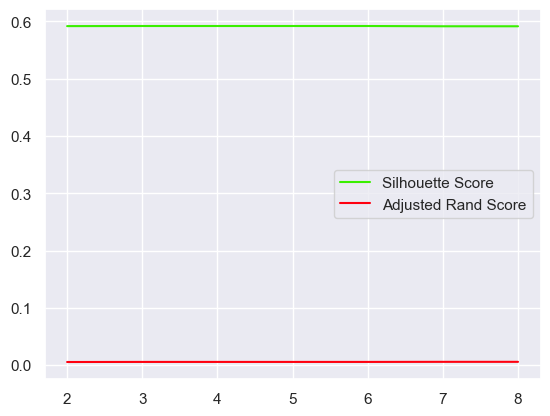

In [42]:
plt.plot(range(2, max_dimension + 1), score['silhouette'], label='Silhouette Score')
plt.plot(range(2, max_dimension + 1), score['adjusted_rand'], label='Adjusted Rand Score')
plt.xticks(range(2, max_dimension + 1))
plt.legend()
plt.show()

The result shows no better. K-Means Clustering is not suitable for this problem.

## OPTICS

OPTICS is a density-based clustering algorithm. It can find clusters of different densities. Let's try it.

In [43]:
from sklearn.cluster import OPTICS

In [44]:
preprocess_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(
        n_components=2, random_state=50
    )),
])

cluster_pipeline = Pipeline([
    ('optics', OPTICS(
        min_samples=5,
        min_cluster_size=0.05,
        n_jobs=-1,
    ))
])

pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('cluster', cluster_pipeline),
])

In [45]:
pipeline.fit(df_unlabeled_data)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=50))])),
                ('cluster',
                 Pipeline(steps=[('optics',
                                  OPTICS(min_cluster_size=0.05, n_jobs=-1))]))])

In [46]:
predicted_labels = pipeline['cluster']['optics'].labels_

no_clusters = len(np.unique(predicted_labels))
no_noise = np.sum(np.array(predicted_labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

print(f'Silhouette Score: {silhouette_score(preprocess_data, predicted_labels)}')
print(f'Adjusted Rand Score: {adjusted_rand_score(true_labels, predicted_labels)}')

Estimated no. of clusters: 2
Estimated no. of noise points: 1878
Silhouette Score: -0.1044365419860366
Adjusted Rand Score: 0.0010861789199435512


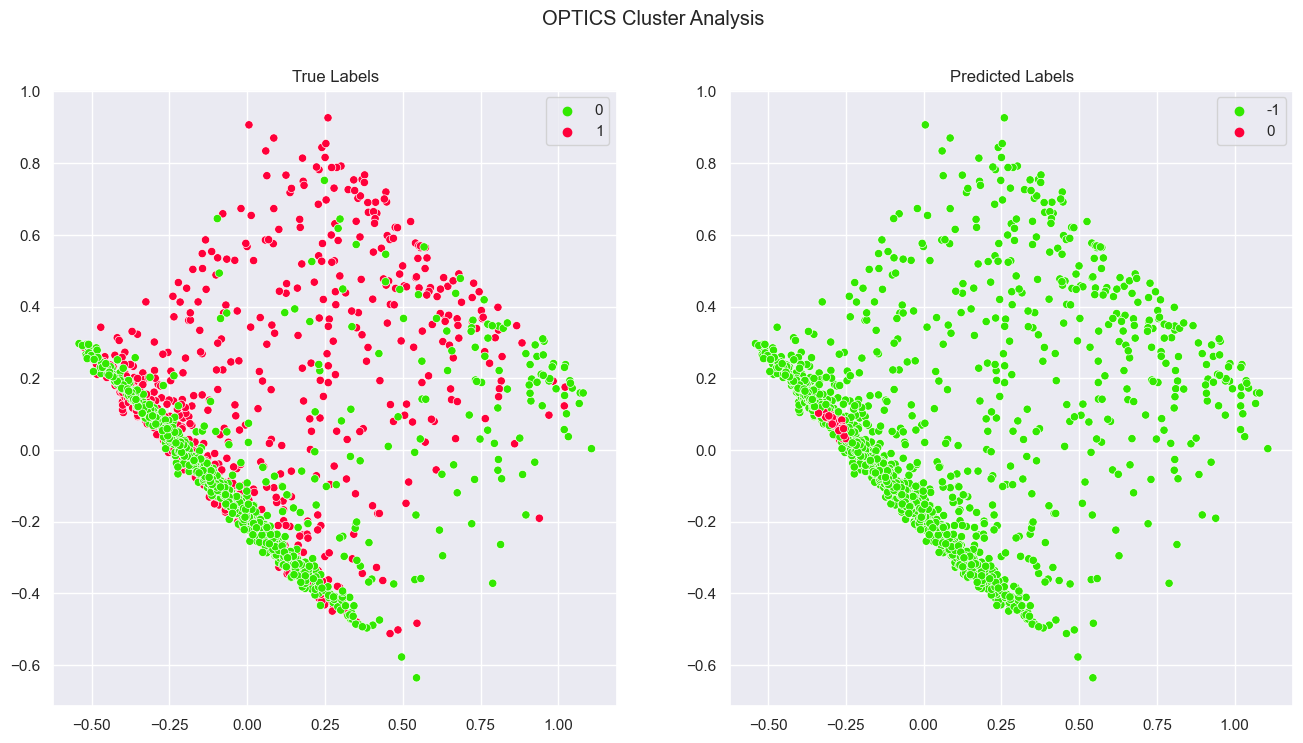

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('OPTICS Cluster Analysis')
axes = axes.flatten()

sns.scatterplot(
    x=preprocess_data[:, 0],
    y=preprocess_data[:, 1],
    hue=true_labels,
    palette=sns.color_palette('prism', 2),
    ax=axes[0],
).set_title('True Labels')

sns.scatterplot(
    x=preprocess_data[:, 0],
    y=preprocess_data[:, 1],
    hue=predicted_labels,
    palette=sns.color_palette('prism', 2),
    ax=axes[1],
).set_title('Predicted Labels')

plt.show()

The result is not good. It can't determine the clusters correctly. Consider to the natural of the data, it's not suitable for clustering algorithms.

# Evaluation

Two majors solutions to solve this problem are categorized into supervised and unsupervised learning.

## Supervised Learning

In this notebook, we have tried Decision Tree and Random Forest. And choose the best based on accuracy, precision and recall scores.

Over-fitting did occur in both algorithms. We can see that the accuracy score of training data is madly higher than testing data in some figures. To solve this, we built and tested them with different hyperparameters. Then, pick the one with highest test score possible.

In [53]:
df_supervised_score

,Decision Tree,Random Forest
Accuracy,0.690594,0.747525
Precision,0.709251,0.761062
Recall,0.731818,0.781818


As the table above, Random Forest is a little bit better than Decision Tree.

## Unsupervised Learning

We have tried K-Means Clustering and OPTICS. And choose the best based on silhouette score and adjusted rand score. But the result is not good even we have try different params.

We visualize data on a scatter plot and see that the data is not suitable for clustering algorithms.

## Conclusion and Future Work

If we have to choose the best solution, we will choose Random Forest. It's more accurate than Decision Tree and it's less over-fitting.

However, there're some problems with data itself. A person's favour can be changed over time so this dataset need a time column to tell when the data was recorded. Without it, we see the loved songs of a single person as a whole. Imagine that a person listen to more than 2000 songs straight. It's unrealistic and misleading.